# Logistic function
(From pythonによる計算物理)

We will try to solve the equation
$$
\frac{dy}{dt} =y(1-y).
$$
This derivative euqation is called a logistic function.

### Solving ligistic function
The simplest method for solving the derivative ewuation is using Euler method, in which
$$
y(t + dt) = y(t) + dt\frac{dy}{dt} = y(t) + y(1-y)
$$
This is called Euler method. Although this is simple, the accuracy is not good. Therefore, several method for improving the accurac was proposed, such as modified Euler method and Runge-Kutta method. We will implement them by ourself first.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Target function
def f_logistic(y):
    return y*(1-y)

# Calculating the next step by Euler mtethod
def step_foward_Eu(f, y, dt):
    return y + f(y)*dt

# Calculating the next step by modified Euler method
def step_foward_mod_Eu(f, y, dt):
    k1 = f(y)
    k3 = f(y + k1*dt)
    return y + (k1 + k3)*dt/2

# Calculating the next step by Runge-Kutta method
def step_foward_RK(f, y, dt):
    k1 = f(y)
    k2 = f(y + k1*dt/2)
    k3 = f(y + k2*dt/2)
    k4 = f(y + k3*dt)
    return y + (k1 + 2*k2 + 2*k3 + k4)*dt/6

In [4]:
def ideal_solution(y0, t):
    return y0/(y0 + (1-y0)*np.exp(-t))

In [5]:
"""
t: list of times
dt: time step
tmax: maximum time
nt: number of time steps
y0: initial value
f: function 
"""

def solve_ode(f, y0, tmax, nt, method):
    t = np.linspace(0, tmax, nt)
    dt = t[1] - t[0]
    y = [y0]
    for _ in range(nt -1):
        # Calculating the value of the next step
        y.append(method(f, y[-1], dt))
    return t, np.array(y)

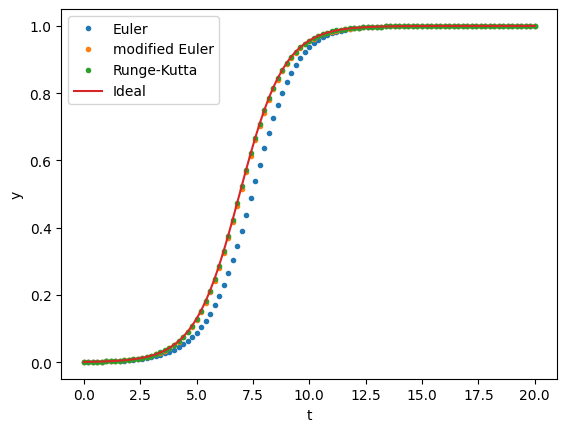

In [6]:
t1, y1 = solve_ode(f_logistic, y0 = 0.001, tmax= 20, nt = 101, method = step_foward_Eu)
t2, y2 = solve_ode(f_logistic, y0 = 0.001, tmax= 20, nt = 101, method = step_foward_mod_Eu)
t3, y3 = solve_ode(f_logistic, y0 = 0.001, tmax= 20, nt = 101, method = step_foward_RK)
y_ideal = ideal_solution(0.001, t1)
fig, ax = plt.subplots()
ax.plot(t1, y1, ".", label = "Euler")
ax.plot(t2, y2, ".", label = "modified Euler")
ax.plot(t3, y3, ".", label = "Runge-Kutta")
ax.plot(t1, y_ideal, "-", label = "Ideal")
ax.set_xlabel("t")
ax.set_ylabel("y")
plt.legend()


Although the overall shape of the functions are the same, the normal Euler method is less acculate. In this time, we can compare the result with the ideal solusion, but we often does not know the exact solution. Therefore, judging the accuracy is not a trivial task. In general, using more number of points can imprve the accuracy, but it is time consuming. If the result does not change so much even after changing the number of points, the results may have good accuracy.

The, let us integrate it with using a liblary, scipy. 

In [19]:
from scipy.integrate import solve_ivp

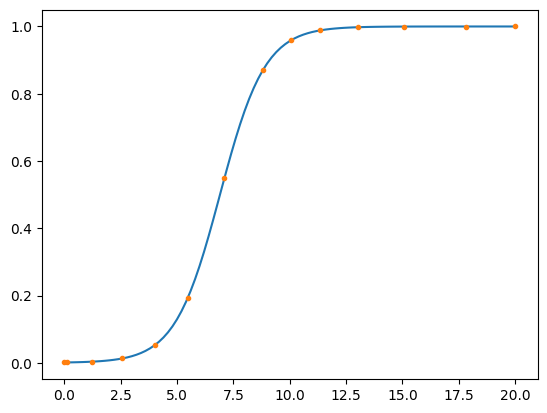

In [24]:
def f_logistic_sci(t, y):
    return y*(1-y)

y0 = np.array([0.001])
t_start = 0
t_end = 20

sol = solve_ivp(f_logistic_sci, (t_start, t_end), y0, dense_output=True)
t_sci = sol.t
y_sci = sol.y[0]

fig, ax = plt.subplots()
ax.plot(t1, y_ideal, "-", label = "Ideal")
ax.plot(t_sci, y_sci, ".", label = "solve_ivp")


The function in Scipy automatically choose the number of points for the given accuracy. Further more, you may realize that the separation of points is also automatically adjusted. This is called adaptive step size control.